In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import pandas as pd
import os

In [2]:
#数据加载
(image_train, label_train),\
(image_test, label_test) = cifar10.load_data()

In [3]:
print('train data shape: ', image_train.shape)
print('train label shape: ', label_train.shape)
print('test data shape: ', image_test.shape)
print('test data shape: ', label_test.shape)

train data shape:  (50000, 32, 32, 3)
train label shape:  (50000, 1)
test data shape:  (10000, 32, 32, 3)
test data shape:  (10000, 1)


In [4]:
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image)

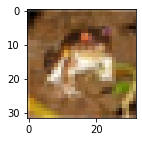

In [5]:
plot_image(image_train[0])

In [6]:
label_dict = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer',
              5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
def plot_images_labels_predictions(images, labels, predictions, index_start, num = 10):
    index = index_start
    fig = plt.gcf()
    fig.set_size_inches(10, 12)
    for i in range(num):
        plt_sub = plt.subplot(5, 5, i+1)
        plt_sub.imshow(images[index])
        title = 'label=' + label_dict[labels[index][0]] 
        if len(predictions) > 0:
            title += ', pred=' + label_dict[predictions[index]]
        plt_sub.set_title(title, fontsize=8)
        plt_sub.set_xticks([])
        plt_sub.set_yticks([])
        index += 1

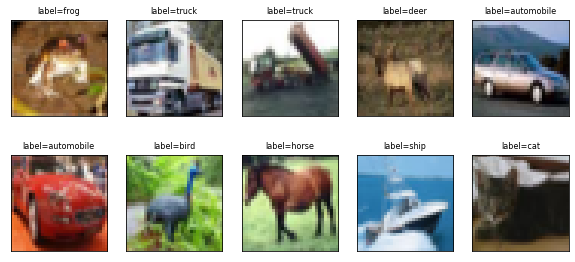

In [7]:
plot_images_labels_predictions(image_train, label_train, [], 0)

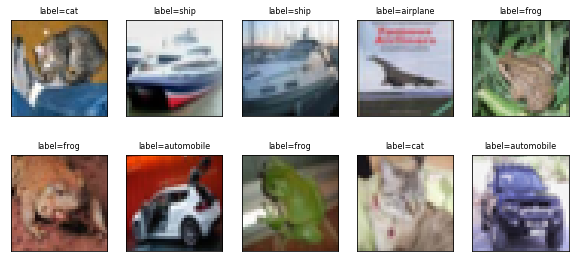

In [8]:
plot_images_labels_predictions(image_test, label_test, [], 0)

In [9]:
# 数据平坦化
#image_train_flat = image_train.reshape(-1, 784)
#image_test_flat = image_test.reshape(-1, 784)

In [10]:
#数据归一化
image_train_normalize = image_train / 255
image_test_normalize = image_test / 255

In [11]:
# One hot
print(label_train[0:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [12]:
label_train_onehot = keras.utils.to_categorical(label_train)
label_test_onehot = keras.utils.to_categorical(label_test)
print(label_train_onehot[0:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [13]:
# Create Model
# VGG16
# Conv Pooling, Conv Pooling, Full connect, output(softmax)
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(3,3),padding='same',input_shape=(32,32,3),activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.AlphaDropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

#relu: max(0, x)
# softmax: 将向量变成概率分布 y = [e^x1/sum, e^x2/sum, e^x3/sum] -> [y1, y2, y3]
# sum = e^x1 + e^x2 + e^x3
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [14]:
model_dir = './savemodel'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
weights_file = os.path.join(model_dir, 'cifar_cnn_image_enhancement_weights.h5')
try:
    model.load_weights(weights_file)
    print('load suc!Continue to train.')
except:
    print('load failed! Restart to train.')

load suc!Continue to train.


In [15]:
# Compile model
# sparse_categorical_crossentropy ?
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['categorical_accuracy'])

In [16]:
# Train
imgGenerator = keras.preprocessing.image.ImageDataGenerator(
                        rotation_range=5,
                        shear_range=1,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        horizontal_flip=True,
                        vertical_flip=False,
                        zoom_range=0.2,
                        fill_mode='nearest')
#imgGenerator.fit(image_train_normalize)
gen = imgGenerator.flow(image_train_normalize, label_train_onehot, batch_size=128)
history = model.fit(x=gen,validation_data=(image_test_normalize, label_test_onehot), epochs=20)

  ...
    to  
  ['...']
Train for 391 steps, validate on 10000 samples
Epoch 1/20
391/391 [==============================] - 31s 78ms/step - loss: 0.9018 - categorical_accuracy: 0.7094 - val_loss: 1.0944 - val_categorical_accuracy: 0.7985
Epoch 2/20
391/391 [==============================] - 26s 66ms/step - loss: 0.8822 - categorical_accuracy: 0.7184 - val_loss: 1.2355 - val_categorical_accuracy: 0.7833
Epoch 3/20
391/391 [==============================] - 26s 67ms/step - loss: 0.8606 - categorical_accuracy: 0.7247 - val_loss: 1.0288 - val_categorical_accuracy: 0.8057
Epoch 4/20
391/391 [==============================] - 27s 69ms/step - loss: 0.8446 - categorical_accuracy: 0.7314 - val_loss: 1.2623 - val_categorical_accuracy: 0.7931
Epoch 5/20
391/391 [==============================] - 26s 66ms/step - loss: 0.8321 - categorical_accuracy: 0.7346 - val_loss: 1.0351 - val_categorical_accuracy: 0.8106
Epoch 6/20
391/391 [==============================] - 26s 67ms/step - loss: 0.8111 - cat

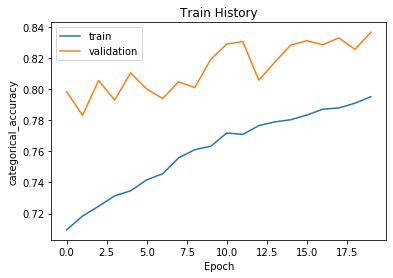

In [17]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='best')

show_train_history(history, 'categorical_accuracy','val_categorical_accuracy')  

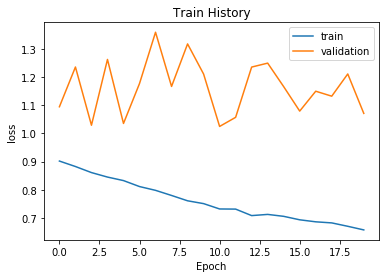

In [18]:
show_train_history(history, 'loss', 'val_loss')

In [19]:
model.evaluate(image_test_normalize, label_test_onehot, verbose=2)

10000/10000 - 2s - loss: 1.0708 - categorical_accuracy: 0.8368


[1.070817982983589, 0.8368]

In [20]:
#Predict
pred = model.predict_classes(image_test_normalize)

In [21]:
print(pred[0:10])

[3 8 8 0 6 6 1 6 3 1]


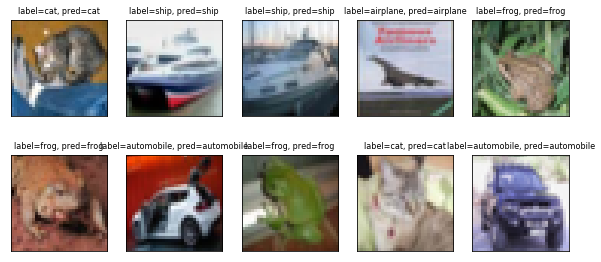

In [22]:
plot_images_labels_predictions(image_test, label_test, pred, index_start=0)

In [23]:
#错误数据分析
pd.crosstab(label_test.reshape(-1,), pred, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,880,11,25,9,5,2,10,25,12,21
1,6,961,1,0,0,0,2,3,5,22
2,48,4,718,25,47,17,95,39,2,5
3,14,9,41,632,41,98,101,51,7,6
4,16,1,20,16,824,6,56,60,1,0
5,8,1,19,111,35,708,35,82,0,1
6,8,3,16,15,5,2,942,6,1,2
7,7,0,6,8,14,9,10,944,0,2
8,71,14,5,3,3,0,11,7,862,24


In [24]:
df = pd.DataFrame({'label':label_test.reshape(-1,), 'predict':pred})
df[:10]

,label,predict
0,3,3
1,8,8
2,8,8
3,0,0
4,6,6
5,6,6
6,1,1
7,6,6
8,3,3
9,1,1


In [25]:
df[(df.label==5)&(df.predict==3)]

,label,predict
128,5,3
158,5,3
178,5,3
502,5,3
549,5,3
...,...,...
9661,5,3
9741,5,3
9823,5,3
9853,5,3


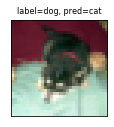

In [26]:
plot_images_labels_predictions(image_test, label_test, pred, index_start=128, num=1)

In [27]:
df[(df.label==9)&(df.predict==4)]

,label,predict
1924,9,4
3980,9,4


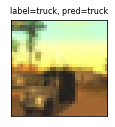

In [28]:
plot_images_labels_predictions(image_test, label_test, pred, index_start=2129, num=1)

In [29]:
model.save_weights(weights_file)
print('save suc!')

save suc!
